# Used Forest Fire Data Exploration
**EDA steps**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing


# 1) Problem statement.

* This dataset inform about the firest fire happen cuses.
* Elpore the  data and find out the causes of forest fire

# 2) Data Collection.
* The Dataset is collected from scrapping from archive.ics.uci.edu
* The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
* 122 instances for each region.
* The period from June 2012 to September 2012.
* The dataset includes 11 attribues and 1 output attribue (class)

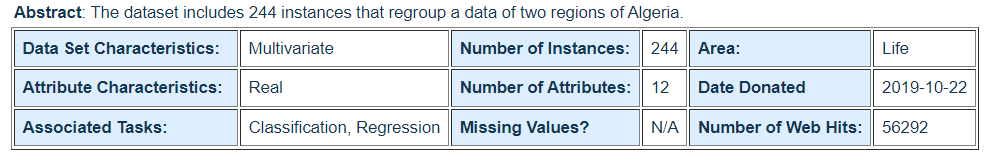

###  Import Data and Required Packages

In [1]:
# data read model
import pandas as pd
import numpy as np
import statistics as st

# graph module
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import warnings
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# for Q-Q plots
import scipy.stats as stats


from six.moves import urllib

# system module
import os

pd.set_option('display.max_rows', 500)


###  Import CSV using Pandas  Dataframe

In [2]:
df =  pd.read_csv("E:\OneDrive - student.amity.edu\office\python & R\DataScience_ineuron\Ineuron tutorial resources\EDA\EDA manual\Algerian_forest_fires_dataset_UPDATE.csv")

### Top 5 Records

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region Dataset
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region Dataset
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region Dataset
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia Region Dataset
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region Dataset


In [4]:
#remove spaces from columna
df.columns = df.columns.str.replace(' ', '')

### Shape of dataset 

In [5]:
df.shape
print('data provide %s rows  and %s columns'%(df.shape[0],df.shape[1]))

data provide 244 rows  and 15 columns


### Statistical Summary of   Dataset

In [6]:
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244,244.000000,244.000000,244,243,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,NaN,NaN,126,8,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,0.4,fire,Bejaia Region Dataset
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,12,131,122
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,NaN,4.774180,16.664754,NaN,NaN,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,NaN,4.175318,14.204824,NaN,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,NaN,0.000000,1.100000,NaN,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,NaN,1.400000,6.000000,NaN,NaN,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,NaN,3.500000,12.250000,NaN,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,NaN,7.300000,22.525000,NaN,NaN,NaN


### DATA Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire 

### Datatypes of  Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


### Find unique value in dataset

In [8]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            126
Classes          8
Region           2
dtype: int64

### Find null value  in dataset

In [9]:
# df.isnull().mean().plot.bar(figsize=(6,4))
px.bar(df.isnull().sum(),width=400,height=400)

In [10]:
#findout the  numerical feature and categorical feature
numerical_feature=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype == 'O']

print("There are %s numerical feature : %s"%(len(numerical_feature),numerical_feature))
print("There are %s categorical feature : %s"%(len(categorical_feature),categorical_feature))

There are 11 numerical feature : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']
There are 4 categorical feature : ['DC', 'FWI', 'Classes', 'Region']


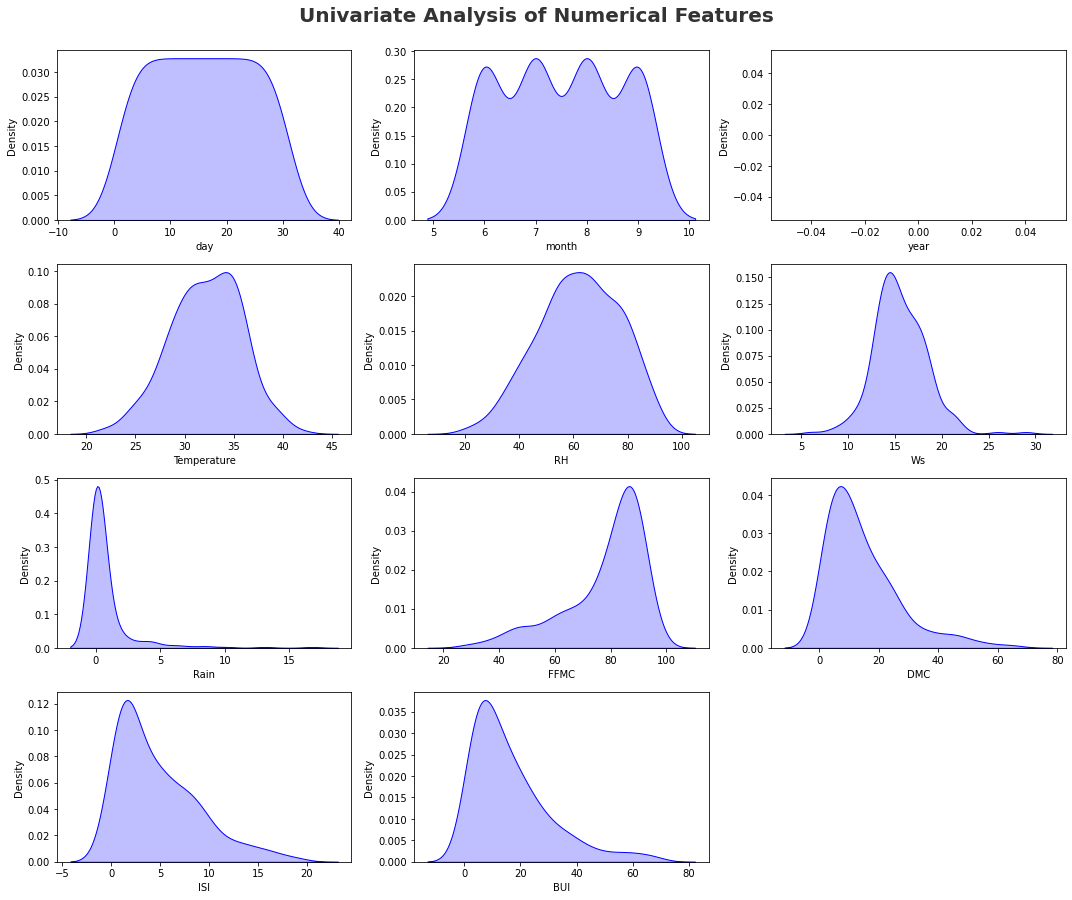

In [11]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True, color='b')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

#### Report
   * rain,DMC,ISI,BUI are right skewed
   * FFMC is left skewed

### multivariate analysis

<Figure size 1080x1080 with 0 Axes>

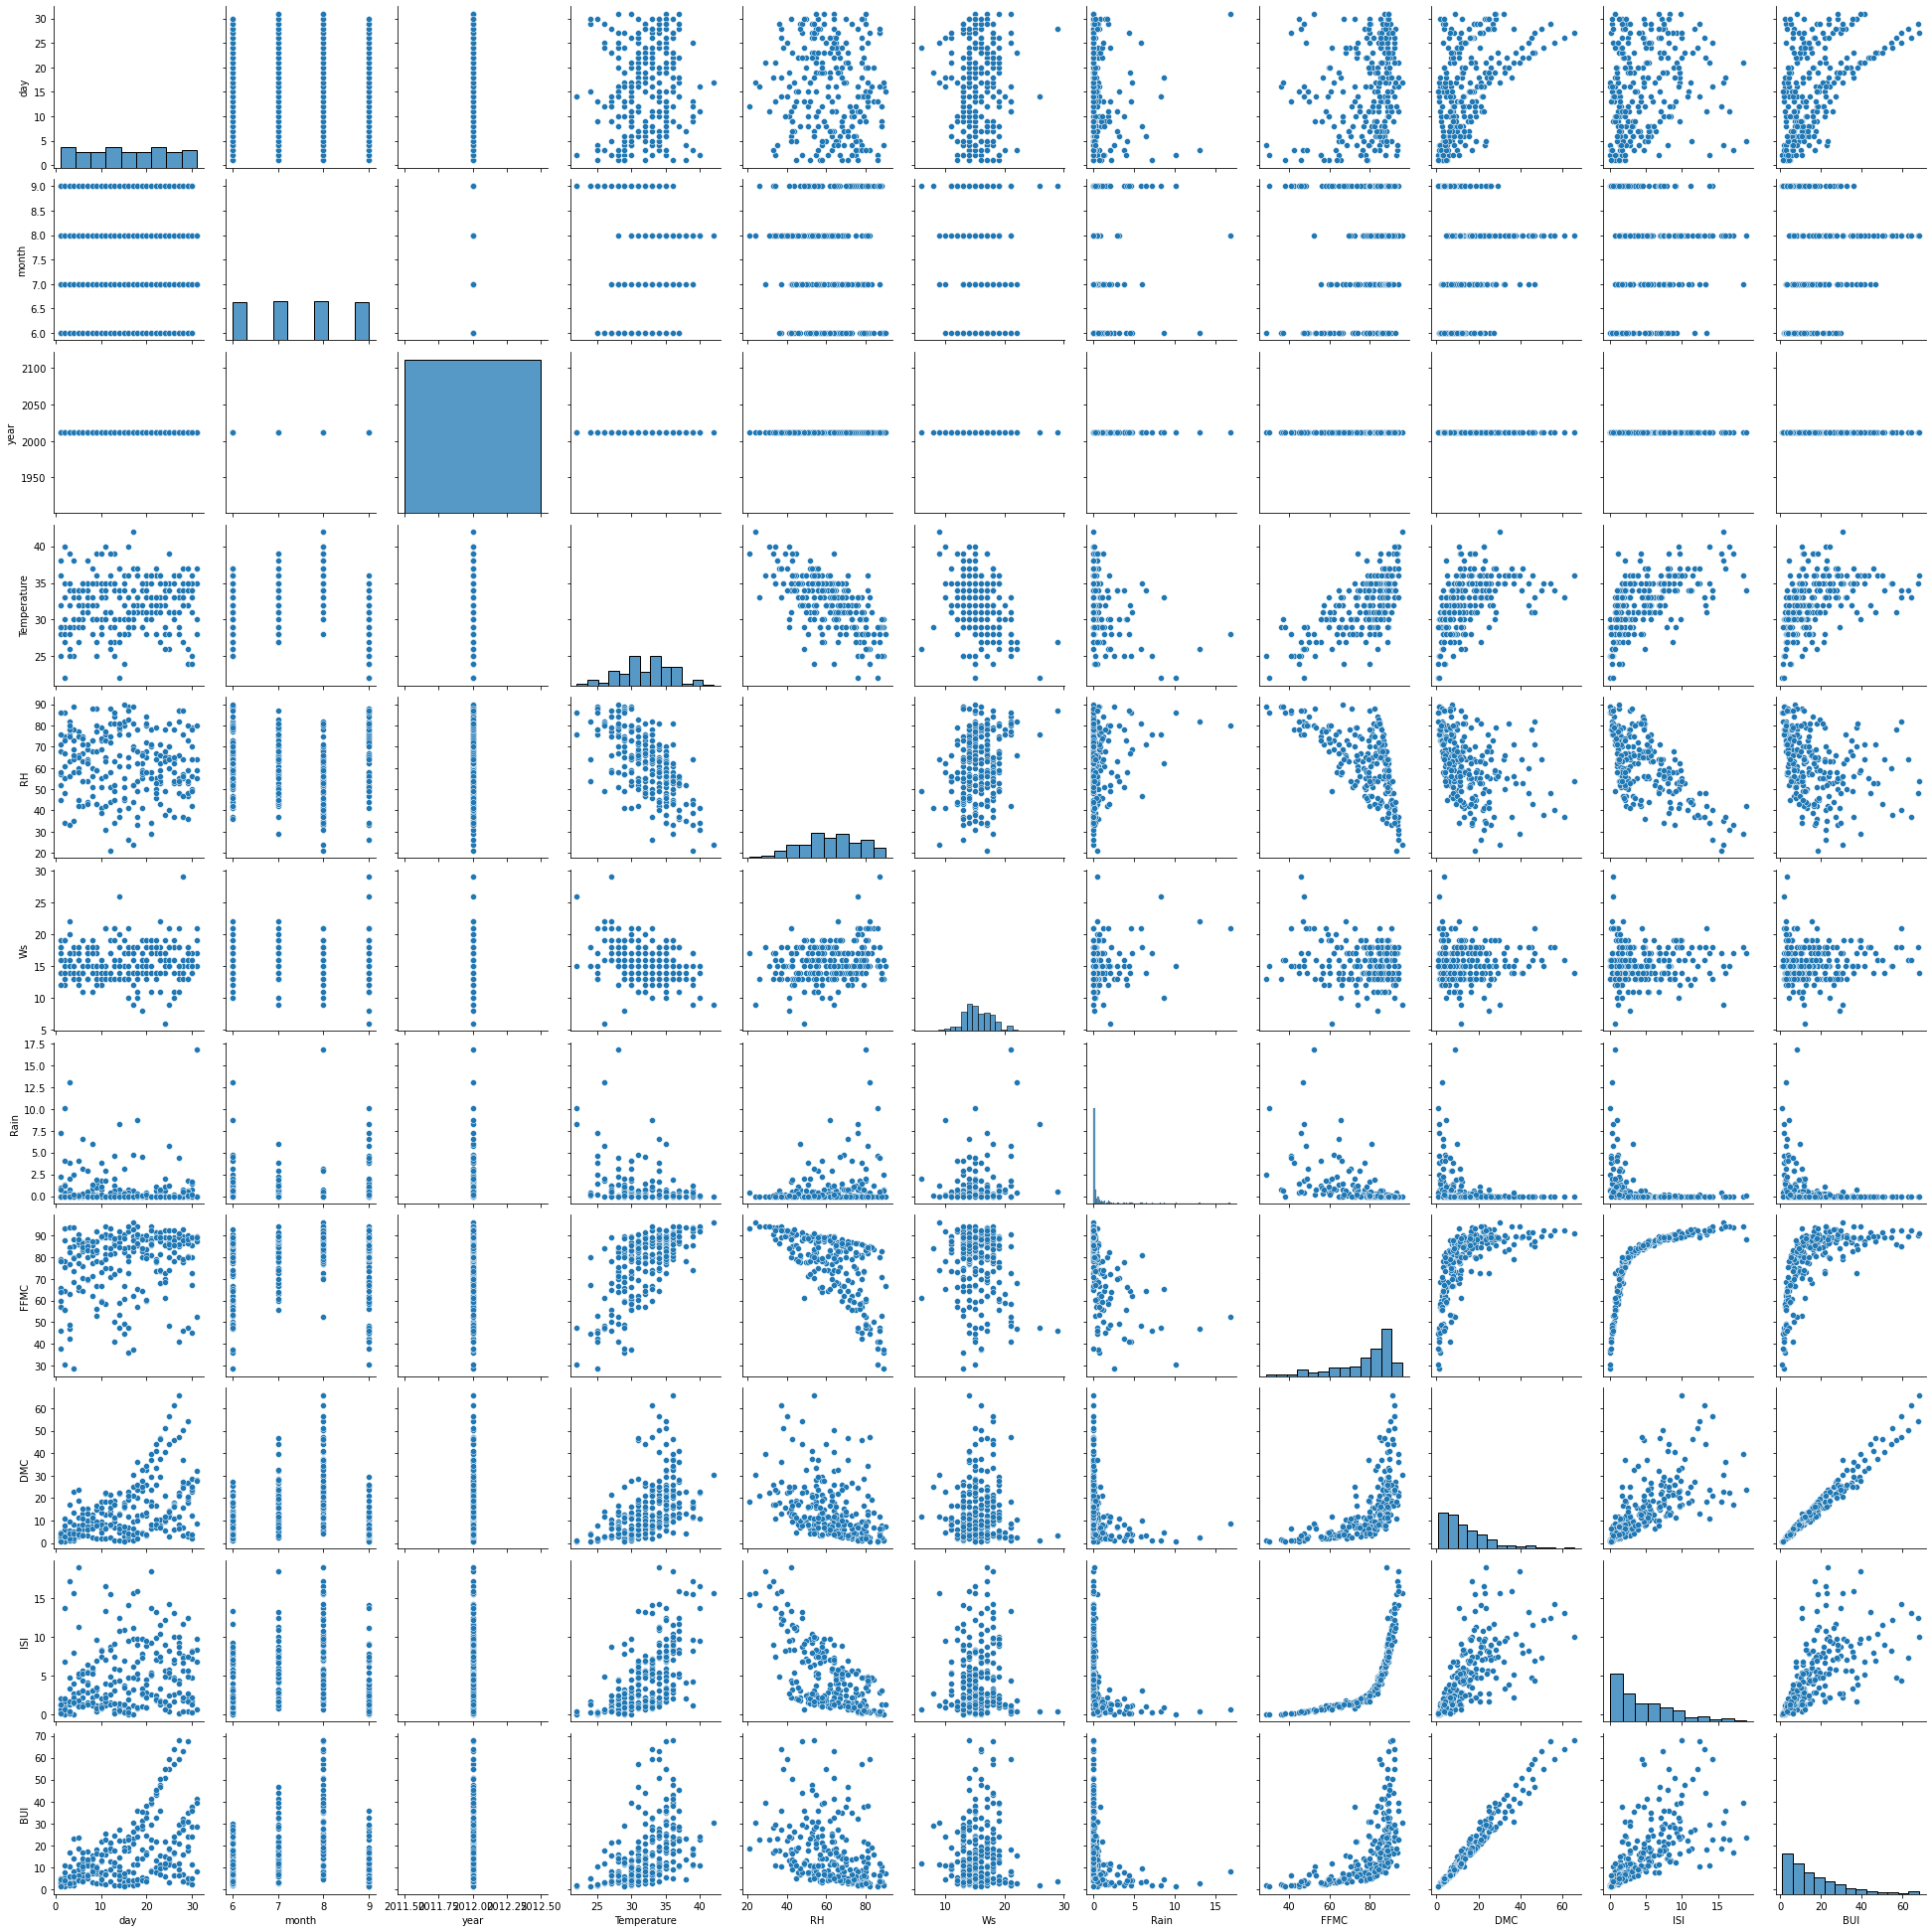

In [12]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20,fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(df)

### Categorical feature

#### remove spaces from categorical value

In [13]:
df['DC'] = df['DC'].str.replace(' ','')

In [14]:
df['FWI'] = df['FWI'].str.replace(' ','')

In [15]:
df['Classes'] = df['Classes'].str.strip()

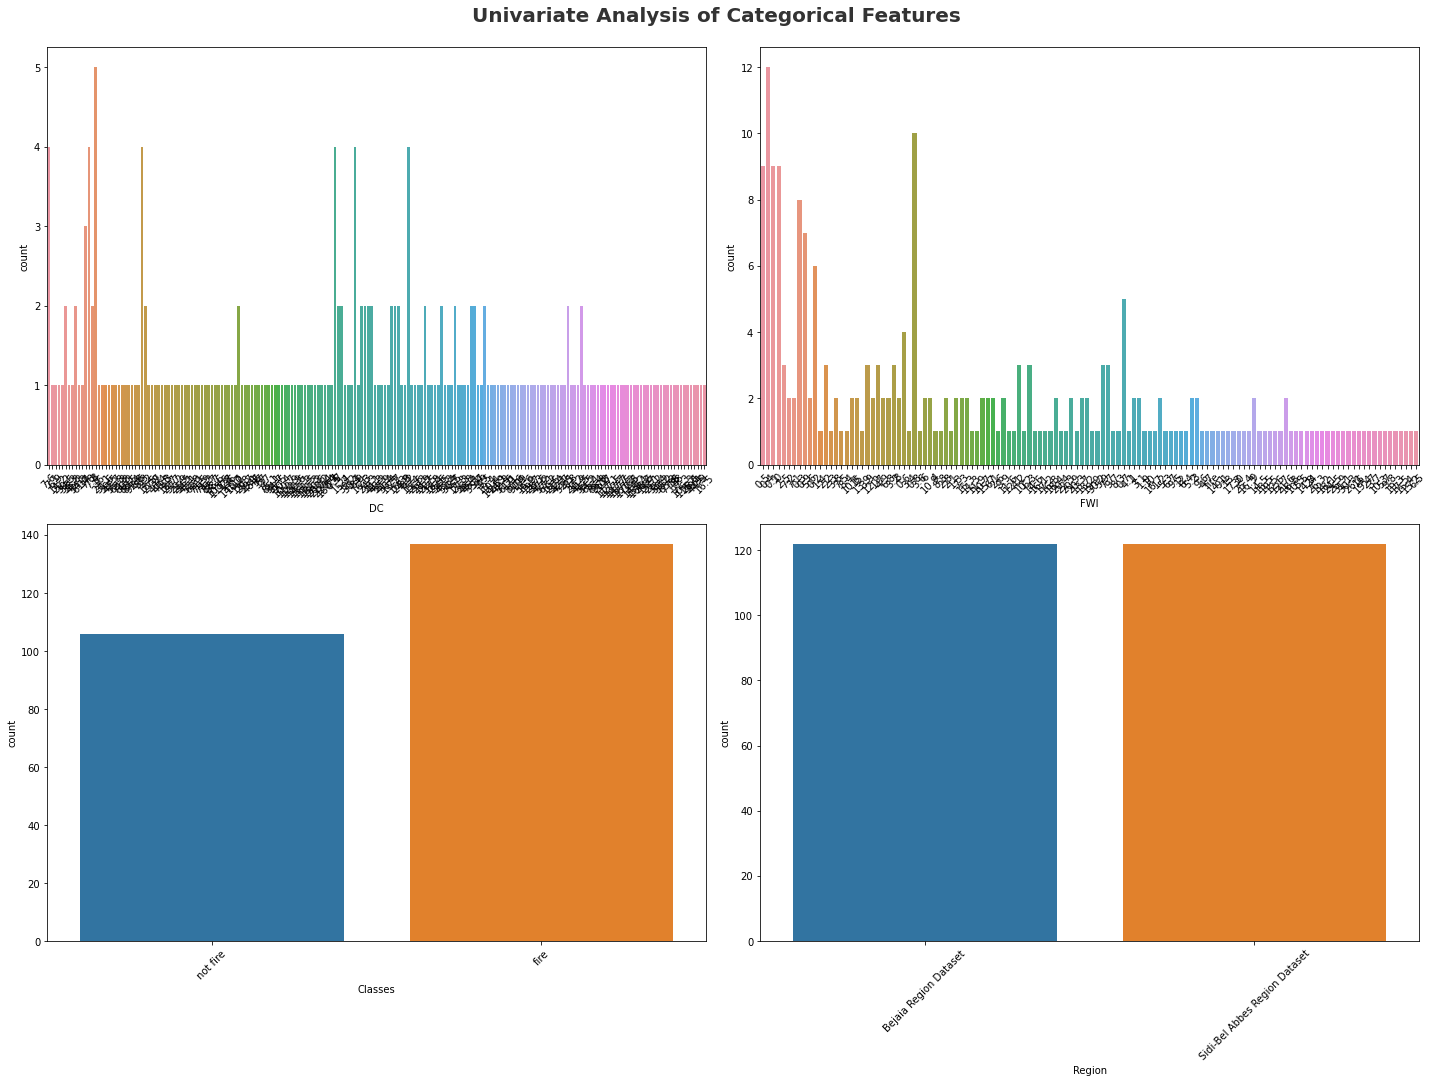

In [16]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'DC', 'FWI', 'Classes', 'Region']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#### Report 
   * DC,FWI is a numerical data but in data it shows object
   * Classes and Region are object data

In [17]:
def diagnostic_plots(df, variable):  
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

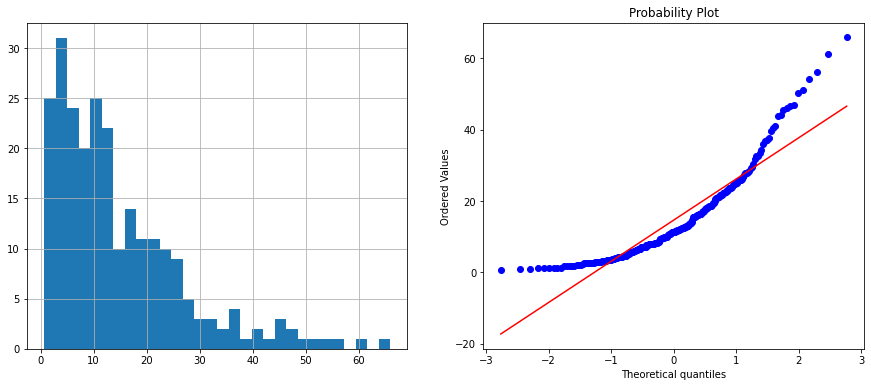

In [19]:
diagnostic_plots(df, 'DMC')

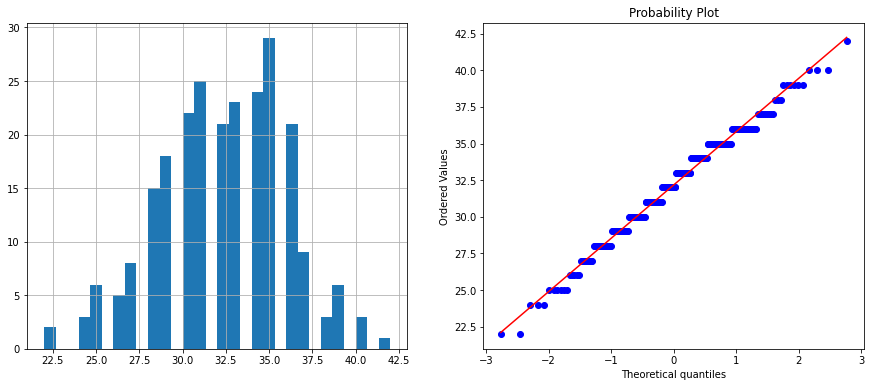

In [20]:
diagnostic_plots(df, 'Temperature')

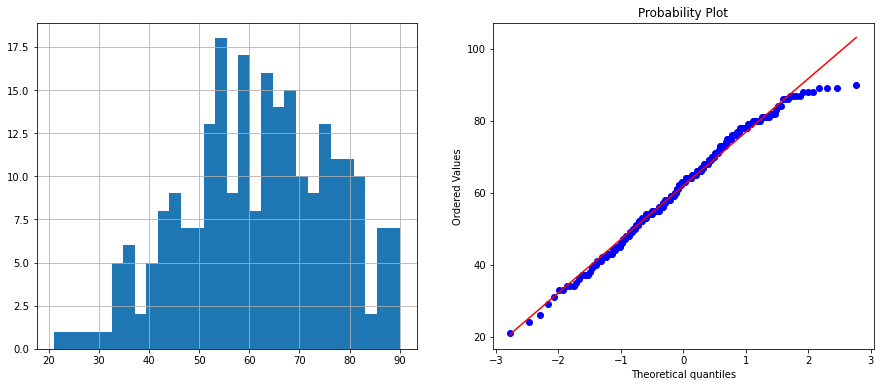

In [21]:
diagnostic_plots(df, 'RH')

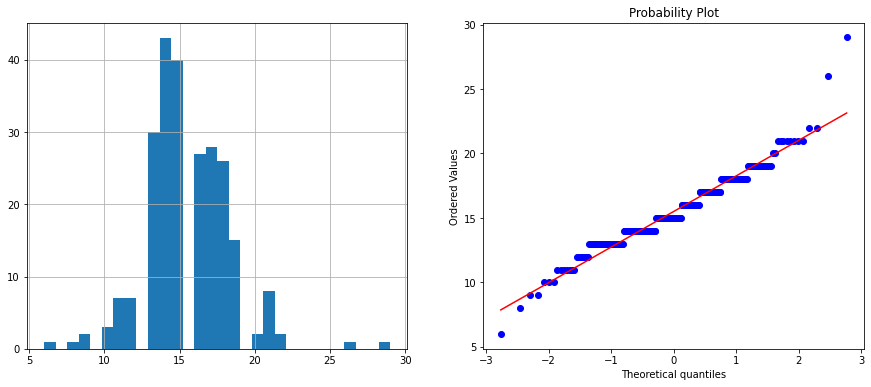

In [22]:
diagnostic_plots(df, 'Ws')

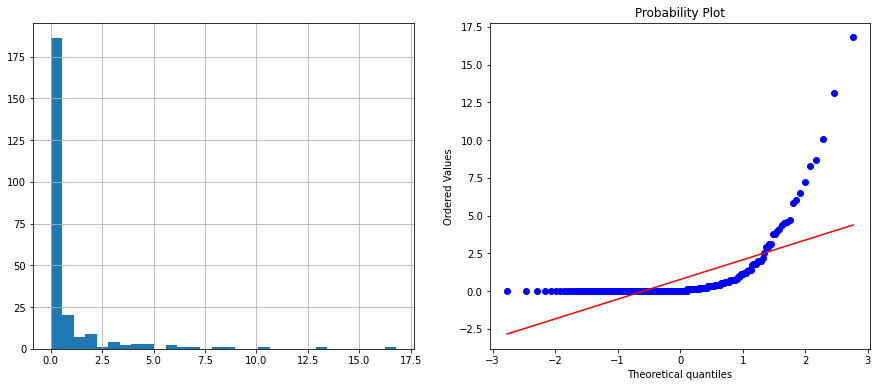

In [23]:
diagnostic_plots(df, 'Rain')

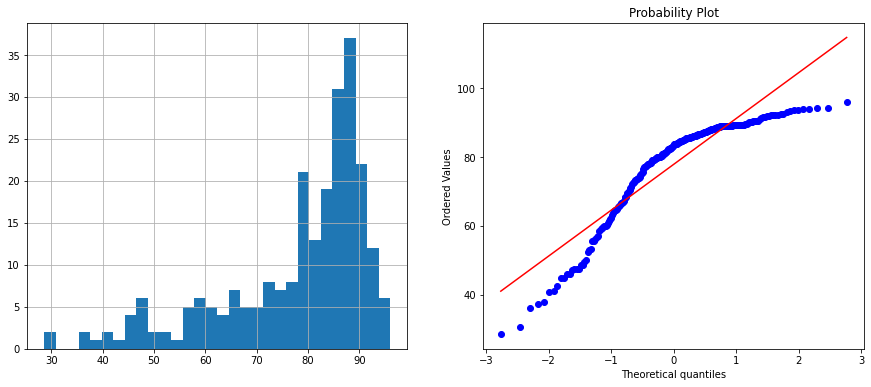

In [24]:
diagnostic_plots(df, 'FFMC')

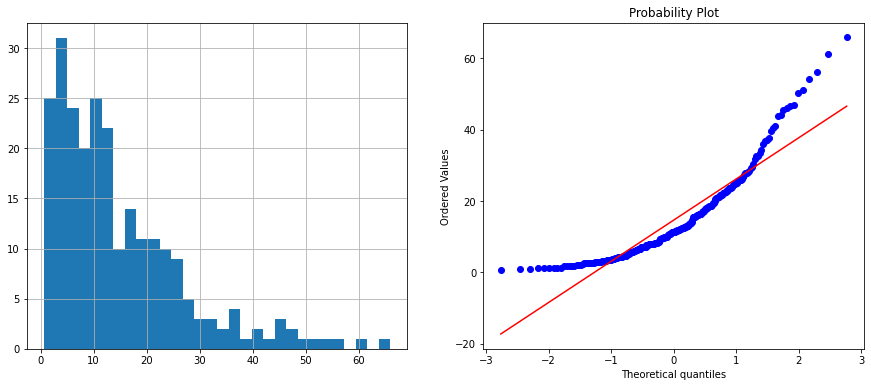

In [25]:
diagnostic_plots(df, 'DMC')

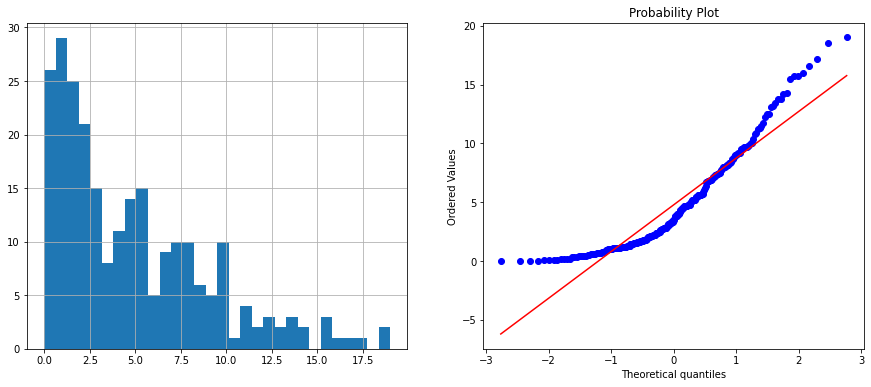

In [26]:
diagnostic_plots(df, 'ISI')

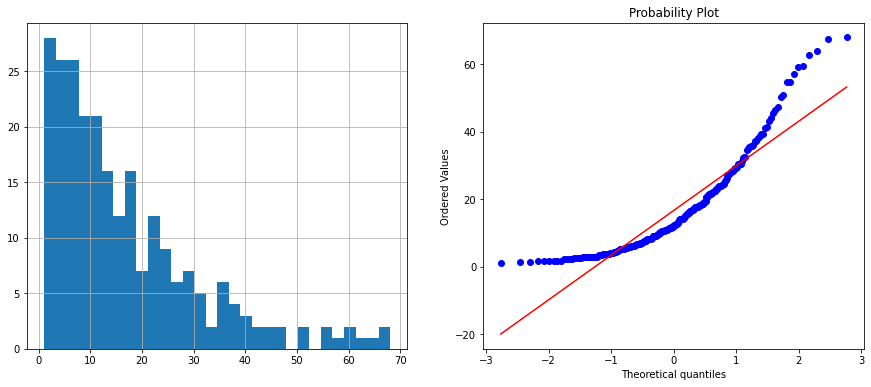

In [27]:
diagnostic_plots(df, 'BUI')

## 5) Data Cleaning

### Convert  object to  numerical column because it is a index value which wil come in float type

#### DC string to float

In [28]:
df['DC'] = [float(x) for x in df['DC']]

#### FWI string to float

In [29]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

#### as we see that in the FWI column all value are float or numeric but value is string so we have to replace the value with a float or integer value 

In [30]:
df[df['FWI'].str.isalnum()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.90,0.0,1.7,0,not fire,Bejaia Region Dataset
15,16,6,2012,29,89,13,0.7,36.1,1.7,7.60,0.0,2.2,0,not fire,Bejaia Region Dataset
16,17,6,2012,30,89,16,0.6,37.3,1.1,7.80,0.0,1.6,0,not fire,Bejaia Region Dataset
26,27,6,2012,34,53,18,0.0,89.0,21.6,80.30,9.2,25.8,15,fire,Bejaia Region Dataset
37,8,7,2012,33,68,19,0.0,85.6,12.5,49.80,6.0,15.4,8,fire,Bejaia Region Dataset
47,18,7,2012,31,68,14,0.0,85.4,12.1,43.10,4.6,14.2,6,fire,Bejaia Region Dataset
49,20,7,2012,33,65,15,0.1,81.4,12.3,62.10,2.8,16.5,4,fire,Bejaia Region Dataset
67,7,8,2012,32,69,16,0.0,86.5,15.5,48.60,5.5,17.2,8,fire,Bejaia Region Dataset
93,2,9,2012,22,86,15,10.1,30.5,0.7,7.00,0.0,1.1,0,not fire,Bejaia Region Dataset
94,3,9,2012,25,78,15,3.8,42.6,1.2,7.50,0.1,1.7,0,not fire,Bejaia Region Dataset


In [31]:
df[df['FWI'].str.isalpha()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN,Sidi-Bel Abbes Region Dataset


In [32]:
#fins out the median value for replace the string value
# res = []
# for r in df['FWI']:
#     try:
#         if float(r) or int(r):
#             res.append(float(r))
#     except ValueError:
#         print(r)
# median  = st.median(res)
# print(median)

In [33]:
# df['FWI'] = df['FWI'].replace('fire',median)

In [34]:
df.drop(df['FWI'].index[165],inplace=True)

In [35]:
df['FWI'] = [float(x) for x in df['FWI']]

In [36]:
df['FWI'].head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

###  lable encoding

In [37]:
df['Region'].unique()

array(['Bejaia Region Dataset', 'Sidi-Bel Abbes Region Dataset'],
      dtype=object)

In [38]:
px.histogram(df['Region'],width=400, height=400)

In [39]:
df['Region'] = df['Region'].map({'Bejaia Region Dataset':0,'Sidi-Bel Abbes Region Dataset':1})

In [40]:
df['Region'].value_counts().reset_index()

,index,Region
0,0,122
1,1,121


In [41]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [42]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [43]:
df['Classes'].isna().sum()

0

In [44]:
mode = st.mode(df['Classes'])
mode

'fire'

In [45]:
df['Classes'].fillna(mode,inplace=True)

In [46]:
px.histogram(df['Classes'],width=400, height=400)


In [47]:
df['Classes']  = df['Classes'].map({'fire':1,'not fire':0})

In [48]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [49]:
df['Classes'].value_counts().reset_index()

,index,Classes
0,1,137
1,0,106


In [50]:
df.drop(['year'],axis=1,inplace=True)

### check multicollinerity in numerical feature

In [51]:
df[(list(df.columns)[1:])].corr()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
month,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
Temperature,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.085073,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408


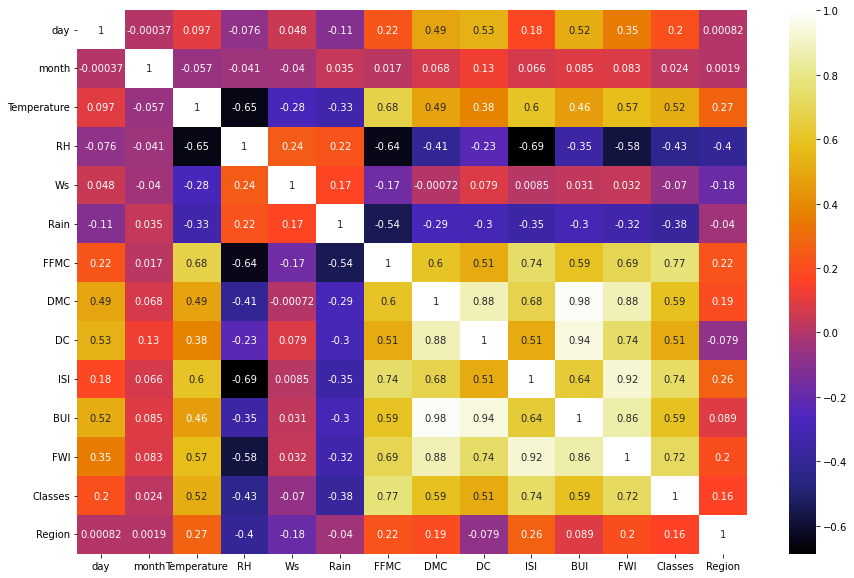

In [52]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

#### Report
  * As we see year column has not use in dataset so we drop year column
  * As we see there is negative correlation between target layer classes with RH,WS,Rain
  * As we see there is less positive  correlation between target layer classes with day,month

In [53]:
outlier = []
def detect_outlier(data):
    mean = np.mean(data)
    std = np.std(data)
    print(' min {} ,max {} ,mean {},std {}'.format(min(data),max(data),mean,std))
    print("higher value {} ".format(mean+3*std))
    print("lower value {} ".format(mean-3*std))
    threshold = 3
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

        


In [54]:
outlier_iqr = []
def deltect_outlier_quartile(data):
    dataset = sorted(data)
    mean = np.mean(data)
    std = np.std(data)
    q1,q3 = np.quantile(dataset,[.25,.90])
    iqr  =  q3-q1
    lowerf = q1-(1.5*iqr)
    higherf = q3+(1.5*iqr)
    print(' min {} ,max {} ,mean {},std {}'.format(min(data),max(data),mean,std))
    
    for i in dataset:
        if i<lowerf or i>higherf:
            outlier.append(i)
    return outlier

In [55]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


<AxesSubplot:xlabel='RH', ylabel='Temperature'>

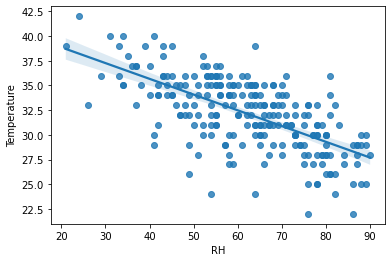

In [56]:
sns.regplot(x="RH",y="Temperature",data=df)

<AxesSubplot:xlabel='RH'>

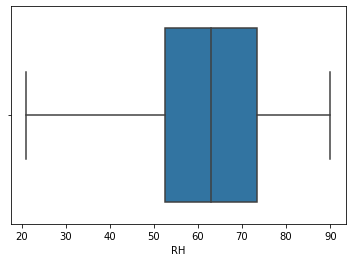

In [57]:
sns.boxplot(df['RH'])

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

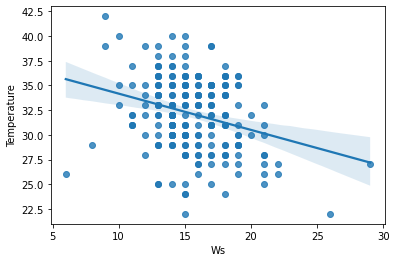

In [58]:
sns.regplot(x="Ws",y="Temperature",data=df)

<AxesSubplot:xlabel='Ws'>

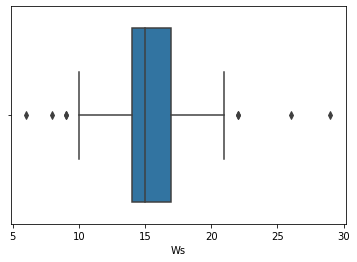

In [59]:
sns.boxplot(df['Ws'])

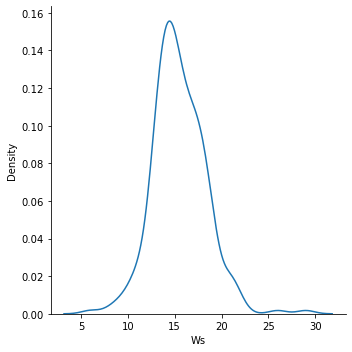

In [60]:
sns.displot(df['Ws'],kind='kde')

In [61]:
# check skewness
df['Ws'].skew()

0.5555858444767362

In [62]:
###find outlier
detect_outlier(df['Ws'])

 min 6 ,max 29 ,mean 15.493827160493828,std 2.8055946023984206
higher value 23.910610967689088 
lower value 7.077043353298565 


[26, 6, 29]

In [63]:
mean_ws = np.mean(df['Ws'])
std_ws = np.std(df['Ws'])
higher_limit =  mean_ws+3*std_ws
lower_limit = mean_ws-3*std_ws

df[(df['Ws']<lower_limit) | (df['Ws']>higher_limit)]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
105,14,9,22,76,26,8.3,47.4,1.1,7.0,0.4,1.6,0.1,0,0
237,24,9,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1


In [64]:
df.shape

(243, 14)

In [65]:
##triming outlier
df = df[(df['Ws']>lower_limit) & (df['Ws']<higher_limit)]

In [66]:
# caping
# df['Ws'] = np.where(df['Ws']>higher_limit
#          ,higher_limit
#          ,np.where(df['Ws']<lower_limit
#                    ,lower_limit,
#                    df['Ws']
#                   )
#             )

In [67]:
df.shape

(240, 14)

<AxesSubplot:xlabel='Ws'>

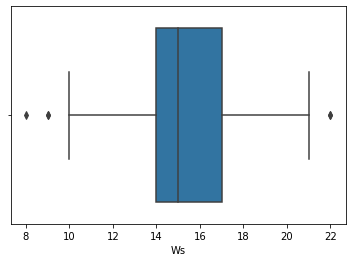

In [68]:
sns.boxplot(df['Ws'])

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

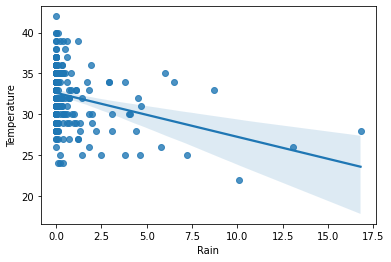

In [69]:
sns.regplot(x="Rain",y="Temperature",data=df)

In [70]:
df['Rain'].describe()

count    240.000000
mean       0.727500
std        1.953859
min        0.000000
25%        0.000000
50%        0.000000
75%        0.425000
max       16.800000
Name: Rain, dtype: float64

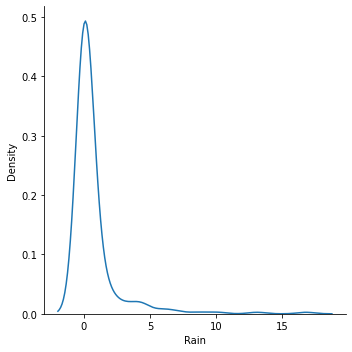

In [71]:
sns.displot(df['Rain'],kind='kde')

In [72]:
# check skewness
df['Rain'].skew()

4.797588802426815

<AxesSubplot:xlabel='Rain'>

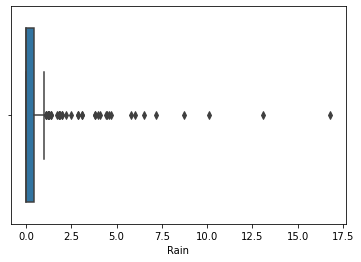

In [73]:
sns.boxplot(df['Rain'])


In [74]:
q25 = df['Rain'].quantile(0.25)
q75 = df['Rain'].quantile(0.75)
iqr = q75-q25
upper_limit = q75 + 1.5*iqr
lower_limit = q25 - 1.5*iqr

q25,q75,iqr,lower_limit,upper_limit

(0.0, 0.42500000000000004, 0.42500000000000004, -0.6375000000000001, 1.0625)

In [75]:
df[df['Rain']<lower_limit]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [76]:
df[df['Rain']>upper_limit]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
12,13,6,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,0,0
14,15,6,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,0,0
31,2,7,27,75,19,1.2,55.7,2.4,8.3,0.8,2.8,0.3,0,0
38,9,7,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,0,0
91,31,8,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,0,0
92,1,9,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0,0
93,2,9,22,86,15,10.1,30.5,0.7,7.0,0.0,1.1,0.0,0,0


In [77]:
# caping
df['Rain'] = np.where(df['Rain']>upper_limit
         ,upper_limit
         ,np.where(df['Rain']<lower_limit
                   ,lower_limit,
                   df['Rain']
                  )
            )

In [78]:
df.shape

(240, 14)

<AxesSubplot:xlabel='Rain'>

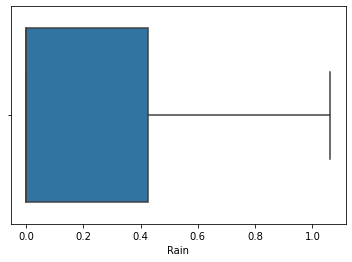

In [79]:
sns.boxplot(df['Rain'])

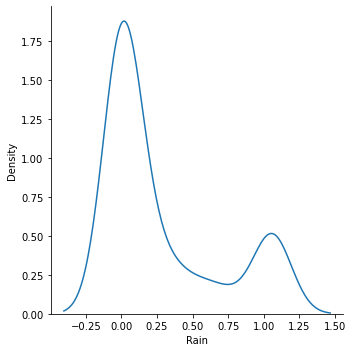

In [80]:
sns.displot(df['Rain'],kind='kde')

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

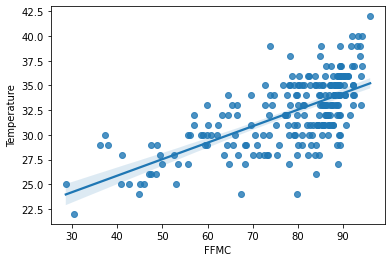

In [81]:
sns.regplot(x="FFMC",y="Temperature",data=df)

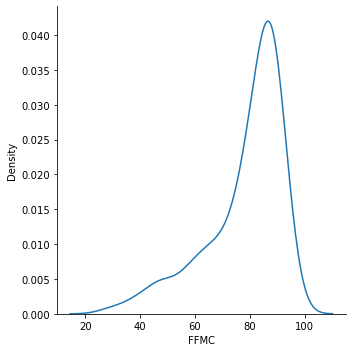

In [82]:
sns.displot(df['FFMC'],kind='kde')

In [83]:
df['FFMC'].skew()

-1.3784701843619993

<AxesSubplot:xlabel='FFMC'>

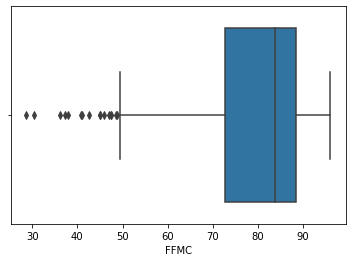

In [84]:
sns.boxplot(df['FFMC'])

In [85]:
df['FFMC'].describe()

count    240.00000
mean      78.17125
std       14.11016
min       28.60000
25%       72.67500
50%       83.70000
75%       88.30000
max       96.00000
Name: FFMC, dtype: float64

In [86]:
q3_ffmc = df['FFMC'].quantile(0.75)
q1_ffmc = df['FFMC'].quantile(0.25)
iqr_ffmc = q3_ffmc-q1_ffmc
lower_limit_ffmc = q1_ffmc - 1.5 * iqr_ffmc
upper_limit_ffmc = q3_ffmc + 1.5 * iqr_ffmc
q1_ffmc, q3_ffmc,iqr_ffmc,lower_limit_ffmc,upper_limit_ffmc

(72.675, 88.3, 15.625, 49.2375, 111.7375)

In [87]:
df[df['FFMC']< lower_limit_ffmc]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
2,3,6,26,82,22,1.0625,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,1.0625,28.6,1.3,6.9,0.0,1.7,0.0,0,0
15,16,6,29,89,13,0.7000,36.1,1.7,7.6,0.0,2.2,0.0,0,0
16,17,6,30,89,16,0.6000,37.3,1.1,7.8,0.0,1.6,0.0,0,0
92,1,9,25,76,17,1.0625,46.0,1.3,7.5,0.2,1.8,0.1,0,0
93,2,9,22,86,15,1.0625,30.5,0.7,7.0,0.0,1.1,0.0,0,0
94,3,9,25,78,15,1.0625,42.6,1.2,7.5,0.1,1.7,0.0,0,0
104,13,9,25,86,21,1.0625,40.9,1.3,7.5,0.1,1.8,0.0,0,0
106,15,9,24,82,15,0.4000,44.9,0.9,7.3,0.2,1.4,0.0,0,0
116,25,9,26,81,21,1.0625,48.6,3.0,7.7,0.4,3.0,0.1,0,0


In [88]:
df[df['FFMC']> upper_limit_ffmc]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [89]:
 df['FFMC'] = np.where(
    df['FFMC']< lower_limit_ffmc
    ,lower_limit_ffmc
    ,np.where(
      df['FFMC']> upper_limit_ffmc,
      upper_limit_ffmc,
        df['FFMC']
    )
     )

<AxesSubplot:xlabel='FFMC'>

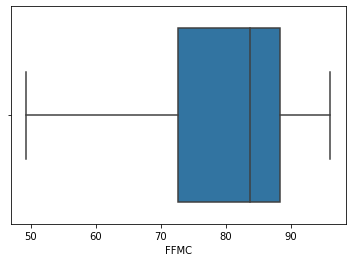

In [90]:
sns.boxplot(df['FFMC'])

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

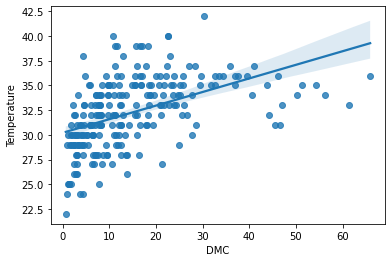

In [91]:
sns.regplot(x="DMC",y="Temperature",data=df)

<AxesSubplot:xlabel='DMC'>

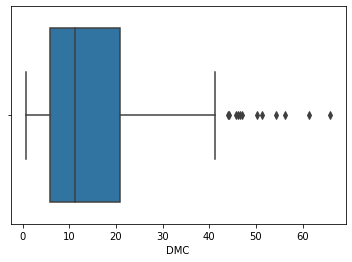

In [92]:
sns.boxplot(df['DMC'])

1.5141397270837338

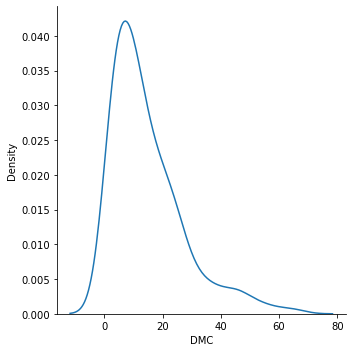

In [93]:
sns.displot(df['DMC'],kind='kde')
df['DMC'].skew()

In [94]:
df['DMC'].describe()

count    240.000000
mean      14.795417
std       12.416723
min        0.700000
25%        5.800000
50%       11.300000
75%       20.900000
max       65.900000
Name: DMC, dtype: float64

In [95]:
q3_dmc = df['DMC'].quantile(0.75)
q1_dmc = df['DMC'].quantile(0.25)
iqr_dmc = q3_dmc-q1_dmc
lower_limit_dmc = q1_dmc - 1.5 * iqr_dmc
upper_limit_dmc = q3_dmc + 1.5 * iqr_dmc
q1_dmc, q3_dmc,iqr_dmc,lower_limit_dmc,upper_limit_dmc

(5.8, 20.9, 15.099999999999998, -16.849999999999998, 43.55)

In [96]:
df[df['DMC']<lower_limit_dmc]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [97]:
df[df['DMC']>upper_limit_dmc]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
85,25,8,35,60,15,0.0,88.9,43.9,181.3,8.2,54.7,20.3,1,0
86,26,8,31,78,18,0.0,85.8,45.6,190.6,4.7,57.1,13.7,1,0
87,27,8,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,1,0
88,28,8,34,64,16,0.0,89.4,50.2,210.4,7.3,62.9,19.9,1,0
89,29,8,35,48,18,0.0,90.1,54.2,220.4,12.5,67.4,30.2,1,0
173,22,7,32,48,18,0.0,91.5,44.2,90.1,13.2,44.0,25.4,1,1
174,23,7,31,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,1,1
205,23,8,36,43,16,0.0,91.2,46.1,137.7,11.5,50.2,24.5,1,1
206,24,8,35,38,15,0.0,92.1,51.3,147.7,12.2,54.9,26.9,1,1
207,25,8,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1,1


In [98]:
df['DMC'] = np.where(df['DMC']>upper_limit_dmc,upper_limit_dmc,np.where(df['DMC']<lower_limit_dmc,lower_limit_dmc,df['DMC']))

<AxesSubplot:xlabel='DMC'>

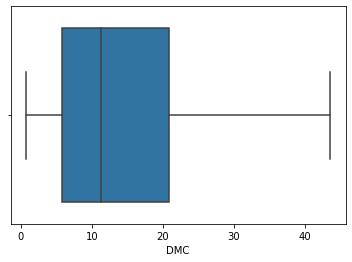

In [99]:
sns.boxplot(df['DMC'])

<AxesSubplot:xlabel='DC', ylabel='Temperature'>

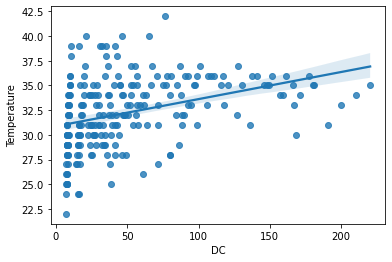

In [100]:
sns.regplot(x="DC",y="Temperature",data=df)

<AxesSubplot:xlabel='DC'>

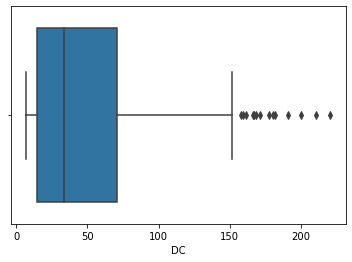

In [101]:
sns.boxplot(df['DC'])

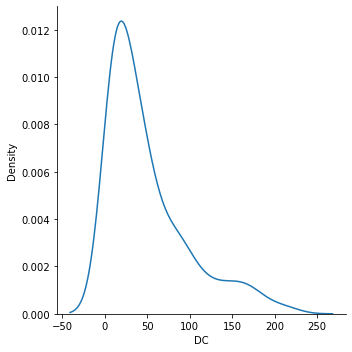

In [102]:
sns.displot(df['DC'],kind='kde')

In [103]:
df['DC'].describe()

count    240.000000
mean      49.869583
std       47.787887
min        6.900000
25%       14.575000
50%       33.750000
75%       71.075000
max      220.400000
Name: DC, dtype: float64

In [104]:
q3_dc = df['DC'].quantile(0.75)
q1_dc = df['DC'].quantile(0.25)
iqr_dc = q3_dc-q1_dc
lower_limit_dc = q1_dc - 1.5 * iqr_dc
upper_limit_dc = q3_dc + 1.5 * iqr_dc
q1_dc, q3_dc,iqr_dc,lower_limit_dc,upper_limit_dc

(14.575, 71.075, 56.5, -70.175, 155.825)

In [105]:
df[df['DC']<lower_limit_dc]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [106]:
df[df['DC']>upper_limit_dc]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
83,23,8,36,53,16,0.0,89.5,37.60,161.5,10.4,47.5,22.3,1,0
84,24,8,34,64,14,0.0,88.9,40.50,171.3,9.0,50.9,20.9,1,0
85,25,8,35,60,15,0.0,88.9,43.55,181.3,8.2,54.7,20.3,1,0
86,26,8,31,78,18,0.0,85.8,43.55,190.6,4.7,57.1,13.7,1,0
87,27,8,33,82,21,0.0,84.9,43.55,200.2,4.4,59.3,13.2,1,0
88,28,8,34,64,16,0.0,89.4,43.55,210.4,7.3,62.9,19.9,1,0
89,29,8,35,48,18,0.0,90.1,43.55,220.4,12.5,67.4,30.2,1,0
90,30,8,35,70,17,0.8,72.7,25.20,180.4,1.7,37.4,4.2,0,0
207,25,8,34,40,18,0.0,92.1,43.55,157.5,14.3,59.5,31.1,1,1
208,26,8,33,37,16,0.0,92.2,43.55,167.2,13.1,64.0,30.3,1,1


In [107]:
df['DC'] = np.where(df['DC']>upper_limit_dc,upper_limit_dc,np.where(df['DC']<lower_limit_dc,lower_limit_dc,df['DC']))

<AxesSubplot:xlabel='DC'>

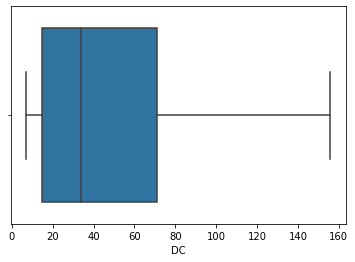

In [108]:
sns.boxplot(df['DC'])

<AxesSubplot:xlabel='ISI', ylabel='Temperature'>

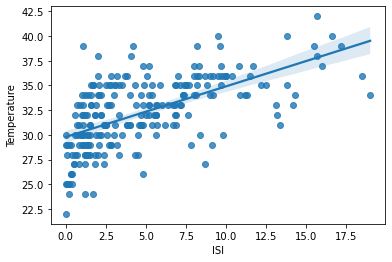

In [109]:
sns.regplot(x="ISI",y="Temperature",data=df)

<AxesSubplot:xlabel='ISI'>

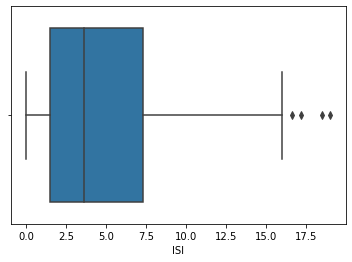

In [110]:
sns.boxplot(df['ISI'])

1.1311652043469416

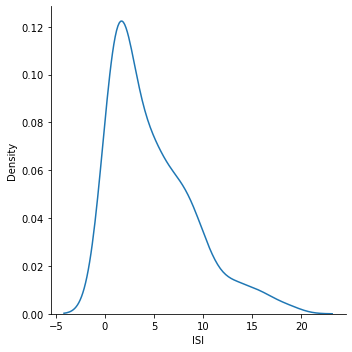

In [111]:
sns.displot(df['ISI'],kind='kde')
df['ISI'].skew()

In [112]:
df['ISI'].describe()

count    240.000000
mean       4.795833
std        4.152327
min        0.000000
25%        1.475000
50%        3.600000
75%        7.300000
max       19.000000
Name: ISI, dtype: float64

In [113]:
q3_isi = df['ISI'].quantile(0.75)
q1_isi = df['ISI'].quantile(0.25)
iqr_isi = q3_isi-q1_isi
lower_limit_isi = q1_isi - 1.5 * iqr_isi
upper_limit_isi = q3_isi + 1.5 * iqr_isi
q1_isi, q3_isi,iqr_isi,lower_limit_isi,upper_limit_isi

(1.475, 7.3, 5.824999999999999, -7.262499999999999, 16.037499999999998)

In [114]:
df[df['ISI']<lower_limit_isi]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [115]:
df[df['ISI']>upper_limit_isi]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
172,21,7,36,29,18,0.0,93.9,39.6,80.6,18.5,39.5,30.0,1,1
185,3,8,39,33,17,0.0,93.7,17.1,32.1,17.2,16.9,19.5,1,1
187,5,8,34,42,17,0.1,88.3,23.6,52.5,19.0,23.5,12.6,1,1
193,11,8,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,21.6,1,1


In [116]:
df['ISI'] = np.where(df['ISI']>upper_limit_isi,upper_limit_isi,np.where(df['ISI']<lower_limit_isi,lower_limit_isi,df['ISI']))

<AxesSubplot:xlabel='ISI'>

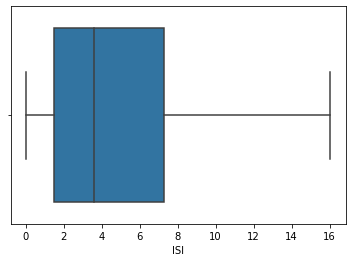

In [117]:
sns.boxplot(df['ISI'])

<AxesSubplot:xlabel='BUI', ylabel='Temperature'>

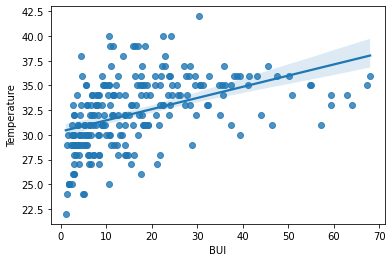

In [118]:
sns.regplot(x="BUI",y="Temperature",data=df)

<AxesSubplot:xlabel='BUI'>

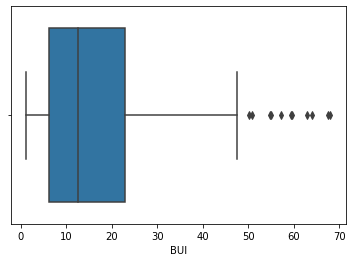

In [119]:
sns.boxplot(df['BUI'])

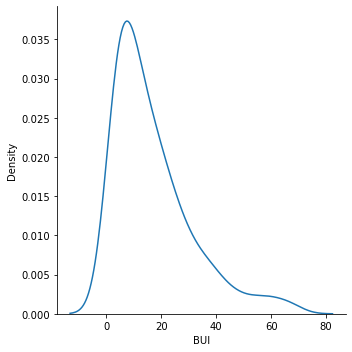

In [120]:
sns.displot(df['BUI'],kind='kde')

In [121]:
 df['BUI'].describe()

count    240.000000
mean      16.828750
std       14.254194
min        1.100000
25%        6.075000
50%       12.500000
75%       22.900000
max       68.000000
Name: BUI, dtype: float64

In [122]:
q3_bui = df['BUI'].quantile(0.75)
q1_bui = df['BUI'].quantile(0.25)
iqr_bui = q3_bui-q1_bui
lower_limit_bui = q1_bui - 1.5 * iqr_bui
upper_limit_bui = q3_bui + 1.5 * iqr_bui
q1_bui, q3_bui,iqr_bui,lower_limit_bui,upper_limit_bui

(6.074999999999999, 22.9, 16.825, -19.162499999999998, 48.137499999999996)

In [123]:
df[df['BUI']<lower_limit_bui]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [124]:
df[df['BUI']>upper_limit_bui]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
84,24,8,34,64,14,0.0,88.9,40.50,155.825,9.0,50.9,20.9,1,0
85,25,8,35,60,15,0.0,88.9,43.55,155.825,8.2,54.7,20.3,1,0
86,26,8,31,78,18,0.0,85.8,43.55,155.825,4.7,57.1,13.7,1,0
87,27,8,33,82,21,0.0,84.9,43.55,155.825,4.4,59.3,13.2,1,0
88,28,8,34,64,16,0.0,89.4,43.55,155.825,7.3,62.9,19.9,1,0
89,29,8,35,48,18,0.0,90.1,43.55,155.825,12.5,67.4,30.2,1,0
205,23,8,36,43,16,0.0,91.2,43.55,137.700,11.5,50.2,24.5,1,1
206,24,8,35,38,15,0.0,92.1,43.55,147.700,12.2,54.9,26.9,1,1
207,25,8,34,40,18,0.0,92.1,43.55,155.825,14.3,59.5,31.1,1,1
208,26,8,33,37,16,0.0,92.2,43.55,155.825,13.1,64.0,30.3,1,1


In [125]:
df['BUI'] = np.where(df['BUI']>upper_limit_bui,upper_limit_bui,np.where(df['BUI']<lower_limit_bui,lower_limit_bui,df['BUI']))

<AxesSubplot:xlabel='BUI'>

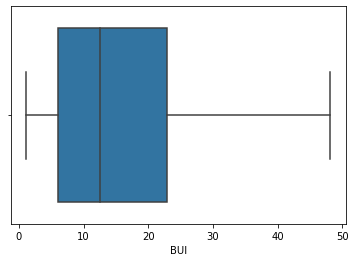

In [126]:
sns.boxplot(df['BUI'])

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

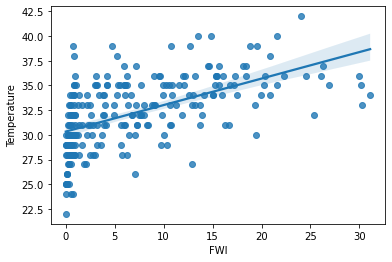

In [127]:
sns.regplot(x="FWI",y="Temperature",data=df)

1.1338808198663723

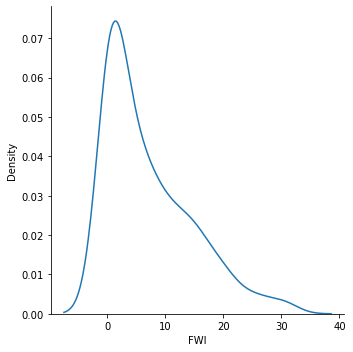

In [128]:
sns.displot(df['FWI'],kind='kde')
df['FWI'].skew()

<AxesSubplot:xlabel='FWI'>

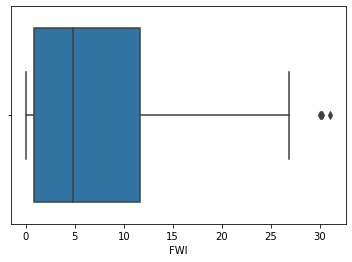

In [129]:
sns.boxplot(df['FWI'])

In [130]:
df['FWI'].describe()

count    240.000000
mean       7.120417
std        7.447734
min        0.000000
25%        0.800000
50%        4.800000
75%       11.675000
max       31.100000
Name: FWI, dtype: float64

In [131]:
q3_FWI = df['FWI'].quantile(0.75)
q1_FWI = df['FWI'].quantile(0.25)
iqr_FWI = q3_FWI-q1_FWI
lower_limit_FWI = q1_FWI - 1.5 * iqr_FWI
upper_limit_FWI = q3_FWI + 1.5 * iqr_FWI
q1_FWI, q3_FWI,iqr_FWI,lower_limit_FWI,upper_limit_FWI

(0.8, 11.675, 10.875, -15.5125, 27.9875)

In [132]:
df[df['FWI']<lower_limit_FWI]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [133]:
df[df['FWI']>upper_limit_FWI]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
89,29,8,35,48,18,0.0,90.1,43.55,155.825,12.5000,48.1375,30.2,1,0
172,21,7,36,29,18,0.0,93.9,39.60,80.600,16.0375,39.5000,30.0,1,1
207,25,8,34,40,18,0.0,92.1,43.55,155.825,14.3000,48.1375,31.1,1,1
208,26,8,33,37,16,0.0,92.2,43.55,155.825,13.1000,48.1375,30.3,1,1


In [134]:
df['FWI'] = np.where(df['FWI']>upper_limit_FWI,upper_limit_FWI,np.where(df['FWI']<lower_limit_FWI,lower_limit_FWI,df['FWI']))

<AxesSubplot:xlabel='FWI'>

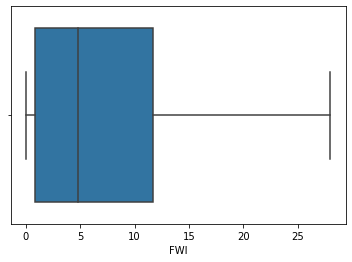

In [135]:
sns.boxplot(df['FWI'])

In [136]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0000,65.7000,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.0625,64.4000,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,1.0625,49.2375,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,1.0625,49.2375,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0000,64.8000,3.0,14.2,1.2,3.9,0.5,0,0


In [137]:
## Independent And Dependent Features
X=df.drop('Temperature',axis=1)
Y=df['Temperature']

In [138]:
X.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,57,18,0.0000,65.7000,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,61,13,1.0625,64.4000,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,82,22,1.0625,49.2375,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,89,13,1.0625,49.2375,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,77,16,0.0000,64.8000,3.0,14.2,1.2,3.9,0.5,0,0


In [139]:
Y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

In [142]:
X_train.shape

(168, 13)

In [143]:
y_train.shape

(168,)

In [144]:
X_test.shape

(72, 13)

In [145]:
y_test.shape

(72,)

In [146]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [147]:
X_train=scaler.fit_transform(X_train)

In [148]:
X_test=scaler.transform(X_test)

In [149]:
X_train

array([[-1.69100208, -1.36054109,  0.55435372, ..., -0.90607543,
        -1.10023921,  1.02409984],
       [ 0.17953849, -0.47802795,  1.20290125, ...,  0.11685567,
         0.90889326,  1.02409984],
       [ 0.29644728,  1.28699833, -1.91012689, ...,  1.16706494,
         0.90889326,  1.02409984],
       ...,
       [ 0.17953849,  1.28699833, -1.19672461, ...,  1.45348565,
         0.90889326,  1.02409984],
       [-1.22336694, -1.36054109, -0.15904856, ..., -0.81060186,
        -1.10023921,  1.02409984],
       [-0.63882301, -1.36054109,  1.07319174, ..., -0.81060186,
        -1.10023921, -0.97646729]])

In [150]:
X_test

array([[-1.34027572e+00,  4.04485188e-01, -1.78041738e+00,
        -1.97057386e-01, -7.13039111e-01,  1.20445110e+00,
         7.54822968e-01, -1.03389618e-01,  2.75549191e+00,
         5.28181667e-01,  1.91721441e+00,  9.08893259e-01,
         1.02409984e+00],
       [-9.89549367e-01,  1.28699833e+00,  5.54353720e-01,
         6.00668898e-01,  2.65990921e-02, -6.50763744e-01,
        -9.50102082e-01, -3.91945414e-01, -7.73739067e-01,
        -8.40083897e-01, -8.51519106e-01, -1.10023921e+00,
        -9.76467292e-01],
       [-7.55731795e-01, -1.36054109e+00, -2.23903313e-01,
         9.99532040e-01, -4.66493043e-01,  8.61304117e-04,
        -4.93733255e-01, -7.44624720e-01, -5.50055413e-01,
        -5.94103571e-01, -6.74211048e-01, -1.10023921e+00,
         1.02409984e+00],
       [-7.55731795e-01, -4.78027949e-01, -1.26157936e+00,
        -1.97057386e-01,  1.90651286e+00,  3.22840740e-01,
        -4.16236662e-01, -8.54550738e-01, -3.51225499e-01,
        -5.40295374e-01, -5.10542072e

## Model Training

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
regression=LinearRegression()

In [153]:
regression.fit(X_train,y_train)

LinearRegression()

In [154]:
## print the coefficients and the intercept
print(regression.coef_)

[-0.37760471 -0.70345652 -0.26448755 -0.67637119  1.47910241  2.85813506
  0.91275964  1.18583025  0.77071416 -1.50830788 -0.01360104 -0.25762326
 -0.10293394]


In [155]:
print(regression.intercept_)

32.029761904761905


In [156]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [157]:
reg_pred

array([36.77108949, 28.85886868, 31.29354683, 35.67934625, 34.37416854,
       33.40842784, 34.00056275, 32.90728075, 25.61870671, 31.87630401,
       33.5425386 , 36.57531672, 33.52404662, 30.09349553, 36.70744534,
       34.96718201, 25.63249428, 32.72775439, 29.77171778, 34.20223326,
       35.06141672, 31.22472954, 35.74580416, 31.77878723, 33.6025462 ,
       33.53786861, 36.05631225, 35.34535436, 33.76084189, 33.06107696,
       25.52876311, 28.29988877, 33.47912972, 36.79811783, 32.65936553,
       32.96484584, 33.02788332, 33.05150391, 31.18023607, 34.08781502,
       28.32966964, 33.5839263 , 34.49737373, 34.25622573, 31.78829049,
       33.43945476, 32.95269599, 25.7046844 , 31.88777907, 33.3686528 ,
       31.84411936, 32.01285202, 33.33731847, 27.04895774, 35.80032371,
       31.64860651, 33.72726936, 34.26077274, 35.77212716, 31.98651423,
       35.34720796, 34.69055617, 22.76109168, 33.01893914, 28.74204027,
       34.42263448, 34.55429167, 32.46384871, 34.63077359, 34.01

### Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

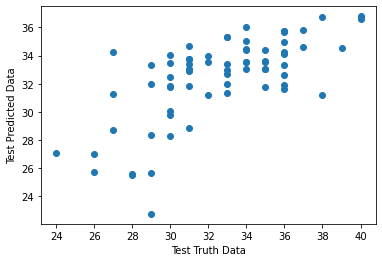

In [158]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [159]:
## residuals
residuals=y_test-reg_pred
# residuals

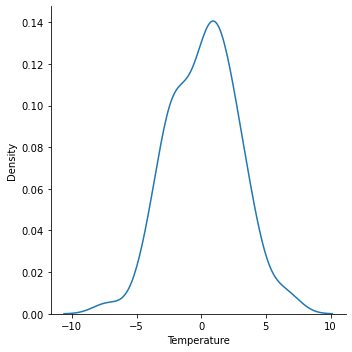

In [160]:
sns.displot(residuals,kind="kde")

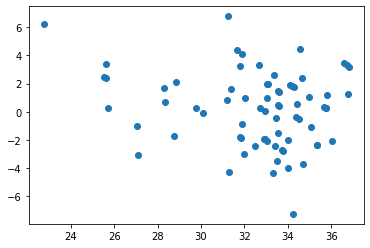

In [161]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [162]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.861205190879424
2.1217427713544543
2.6193902326456486


## R square and adjusted R square

In [163]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.4618581177166362


In [164]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.34124010961864093